# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [37]:
!pip install folium
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter("ignore", category=RuntimeWarning)


In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
df = pd.read_csv('NewYork.csv')

In [5]:
df

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [6]:
df.drop(columns =['dropoff_datetime',], inplace = True)


In [7]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

<Axes: xlabel='trip_duration', ylabel='Count'>

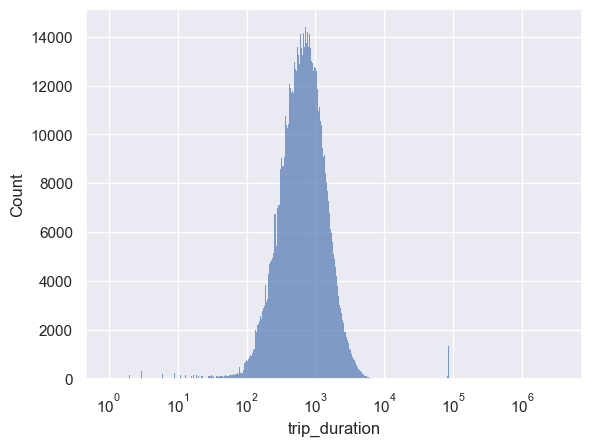

In [8]:
sns.histplot(x='trip_duration',data =df, log_scale= True)

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [9]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [10]:
def rmsle(log1p_y_true, log1p_y_pred): 
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred)**2))
    raise NotImplementedError

rmsle_best_const = rmsle(df['log_trip_duration'],df['log_trip_duration'].mean()) 
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

In [11]:
df['day'] = df['pickup_datetime'].dt.day_of_year

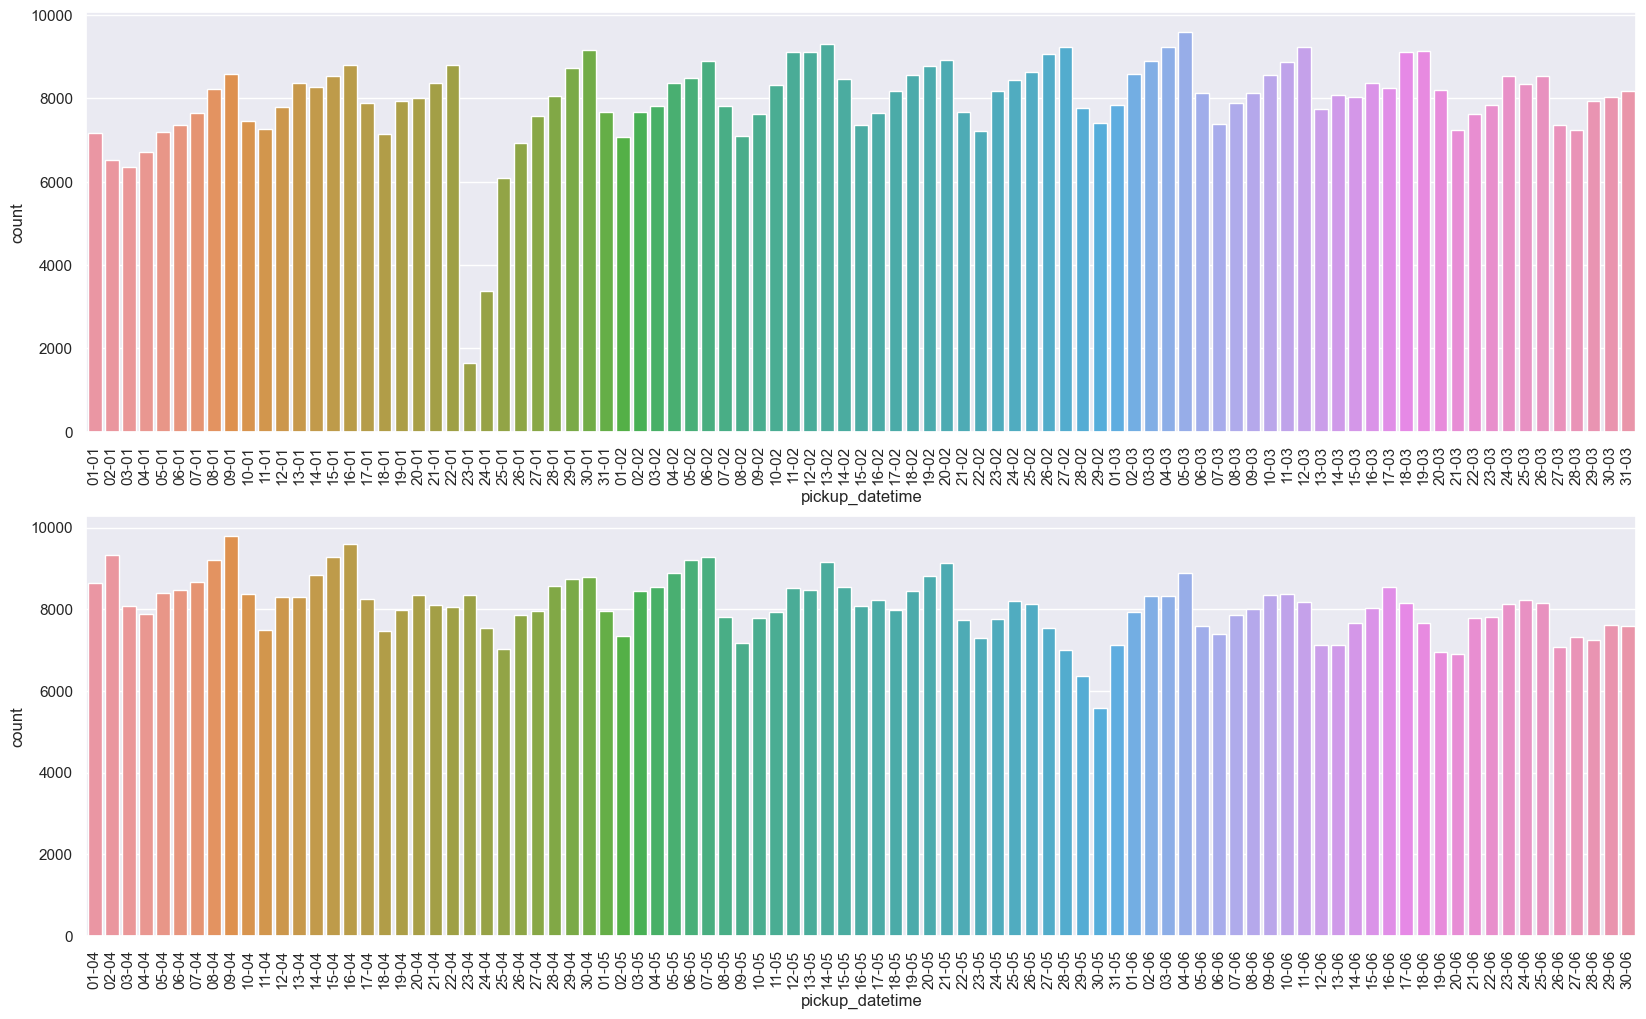

In [12]:
tmp1 = df[df['day'] < df['day'].median()]
tmp2 = df[df['day'] >= df['day'].median()]
fig, axs = plt.subplots(nrows = 2, figsize = (20, 12))
for tmp, ax in zip([tmp1, tmp2], axs):
    sns.countplot(x = tmp['pickup_datetime'].sort_values().dt.strftime('%d-%m'), ax = ax)
    ax.tick_params(axis = 'x', rotation=90)



**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

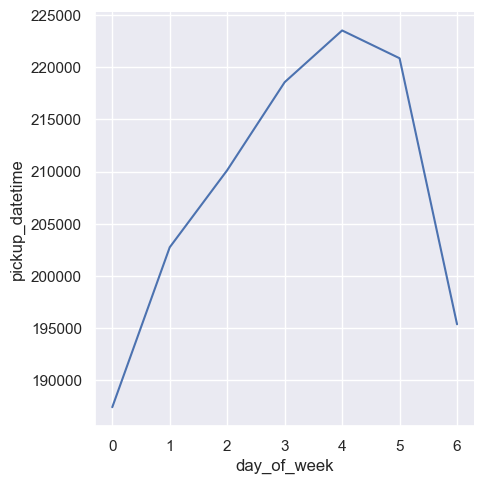

In [13]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
sns.relplot(df.assign( day_of_week = df['pickup_datetime'].dt.day_of_week).groupby(['day_of_week']).count().reset_index(),
           x= 'day_of_week',
           y='pickup_datetime',
           kind = 'line')

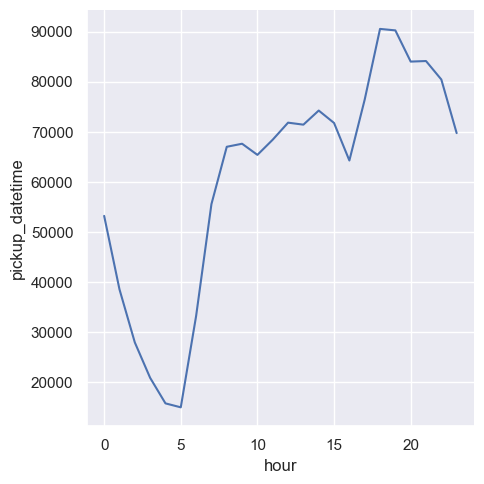

In [14]:
sns.relplot(df.assign(hour = df['pickup_datetime'].dt.hour).groupby(['hour'])['pickup_datetime'].count().reset_index(),
           x = 'hour',
           y = 'pickup_datetime',
           kind = 'line')

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

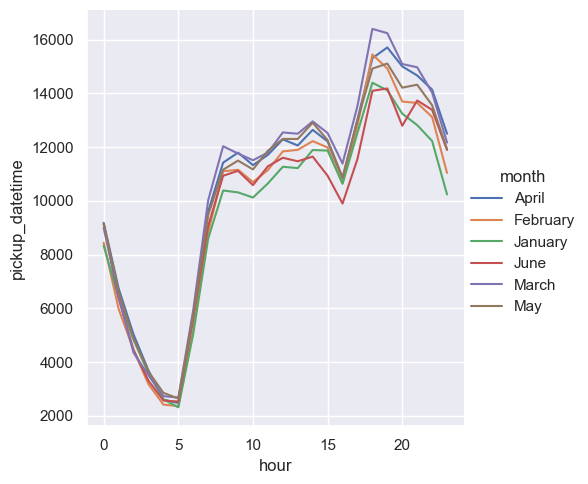

In [15]:
sns.relplot(df.assign(hour = df['pickup_datetime'].dt.hour, month = df['pickup_datetime'].dt.month_name()).groupby(['month','hour'])['pickup_datetime'].count().reset_index(),
           x = 'hour',
           y = 'pickup_datetime',hue ='month',

           kind = 'line')

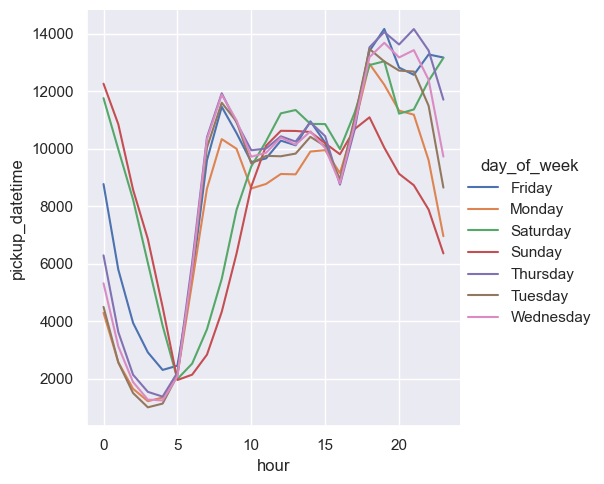

In [16]:
sns.relplot(df.assign(hour = df['pickup_datetime'].dt.hour, day_of_week = df['pickup_datetime'].dt.day_name()).groupby(['day_of_week','hour'])['pickup_datetime'].count().reset_index(),
           x = 'hour',
           y = 'pickup_datetime',hue ='day_of_week',

           kind ='line')

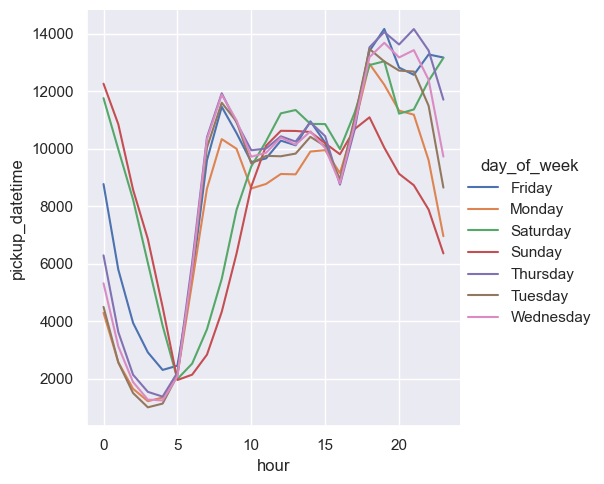

In [17]:
sns.relplot(df.assign(hour = df['pickup_datetime'].dt.hour, day_of_week = df['pickup_datetime'].dt.day_name()).groupby(['day_of_week','hour'])['pickup_datetime'].count().reset_index(),
           x = 'hour',
           y = 'pickup_datetime',hue ='day_of_week',

           kind = 'line')

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.3, random_state=10)

In [19]:
tmp3 = X_train.assign(day_of_week = X_train['pickup_datetime'].dt.day_of_week).groupby(['day_of_week'])['log_trip_duration'].mean().reset_index()

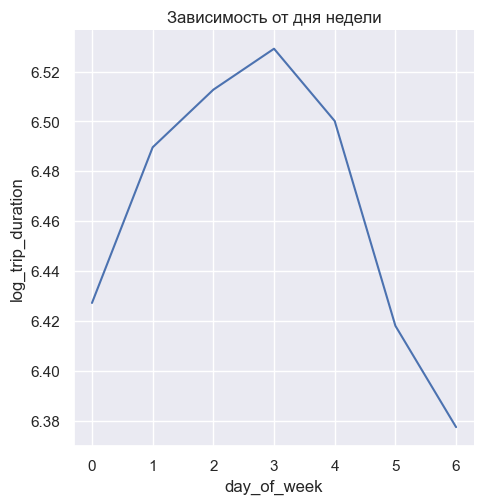

In [20]:
g = sns.relplot(tmp3,
           x = 'day_of_week',
           y = 'log_trip_duration',
           kind='line')
g.set(title = 'Зависимость от дня недели')

In [21]:
tmp3 = X_train.assign(hour = X_train['pickup_datetime'].dt.hour).groupby(['hour'])['log_trip_duration'].mean().reset_index()

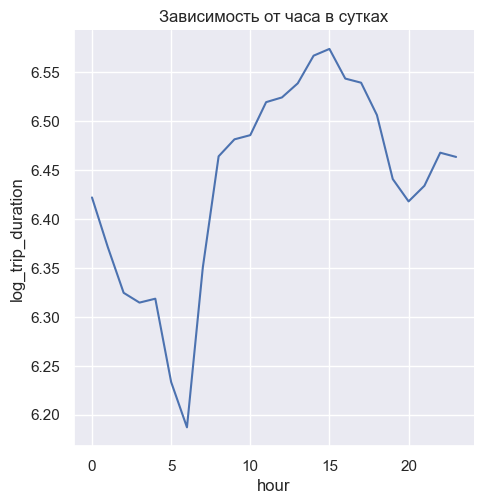

In [22]:
g = sns.relplot(tmp3, x='hour', y='log_trip_duration', kind = 'line')
g.set(title = "Зависимость от часа в сутках")



In [23]:
tmp3 =X_train.assign(day = X_train['pickup_datetime'].dt.day_of_year).groupby(['day'])['log_trip_duration'].mean().reset_index()


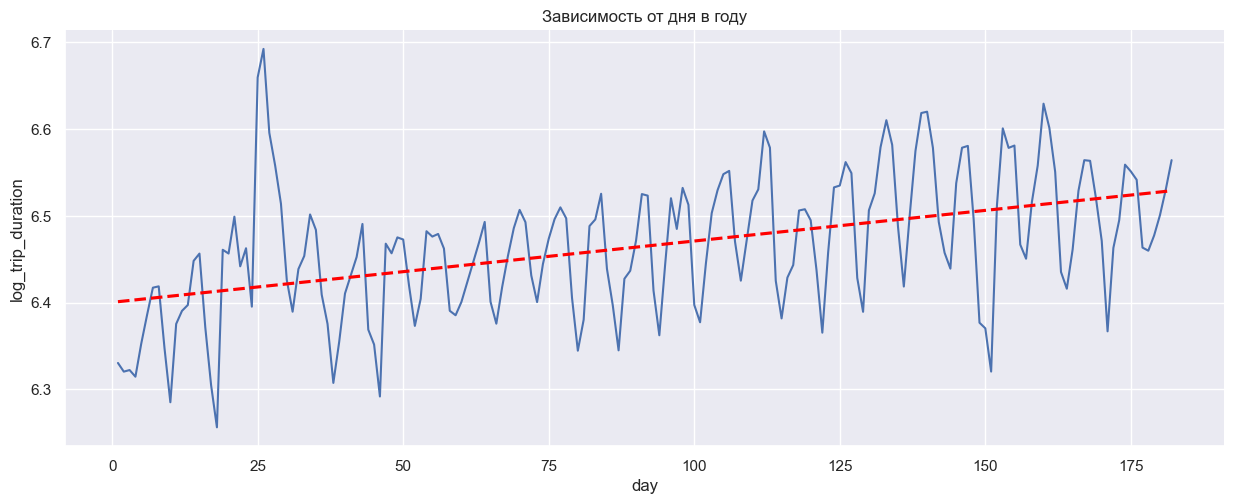

In [24]:
g = sns.relplot(tmp3,
               x = 'day',
               y = 'log_trip_duration',
               kind = 'line',
               aspect = 2.5)
sns.regplot(
    data=tmp3,
    x='day',
    y='log_trip_duration',
    ci=None,  # Убираем доверительный интервал
    scatter=False,  # Цвет точек
    line_kws={'color': 'red', 'linestyle':'--'}  # Цвет линии тренда
)
g.set(title = 'Зависимость от дня в году')

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [25]:
def add_features(dataframe):
    dataframe['day_of_week'] = dataframe['pickup_datetime'].dt.day_name()
    dataframe['hour'] = dataframe['pickup_datetime'].dt.hour
    dataframe['month'] = dataframe['pickup_datetime'].dt.month_name()
    dataframe['anom23'] = dataframe['pickup_datetime'].dt.strftime('%d-%m') =='23-01'
    dataframe['anom24'] = dataframe['pickup_datetime'].dt.strftime('%d-%m') =='24-01'
add_features(X_train)
add_features(X_test)

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

In [26]:
X_train

id  vendor_id     pickup_datetime  passenger_count  \
824746   id2365163          2 2016-03-27 00:25:29                3   
645821   id3126187          2 2016-03-18 20:44:12                1   
691846   id2588127          2 2016-04-15 18:26:12                2   
1147931  id0915715          2 2016-03-24 14:28:34                1   
183569   id3758776          1 2016-04-28 13:53:52                1   
...            ...        ...                 ...              ...   
1348317  id2763967          1 2016-05-12 05:16:06                1   
1154171  id0853058          1 2016-01-16 19:14:54                1   
617841   id2242904          1 2016-03-21 20:11:12                1   
1048548  id2558617          1 2016-04-09 09:21:44                1   
1393929  id3799449          1 2016-04-27 09:11:19                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
824746         -73.996986        40.742210         -73.987740   
645821         -73.989929        40.741760         -73.977280   
691846         -73.972366        40.750725         -73.861832   
1147931        -73.982361        40.776901         -73.975128   
183569         -73.973778        40.764374         -73.966957   
...                   ...              ...                ...   
1348317        -73.996178        40.748222         -73.990967   
1154171        -73.995415        40.728886         -73.993706   
617841         -73.960091        40.779701         -73.960136   
1048548        -73.968124        40.799923         -73.952415   
1393929        -74.004715        40.707268         -74.014168   

         dropoff_latitude store_and_fwd_flag  trip_duration  \
824746          40.710659                  N           1254   
645821          40.783600                  N            970   
691846          40.768387                  N           2084   
1147931         40.760921                  N            980   
183569          40.761024                  N            481   
...                   ...                ...            ...   
1348317         40.755478                  N            180   
1154171         40.744068                  N           6552   
617841          40.773102                  N            151   
1048548         40.818588                  N            436   
1393929         40.713989                  N           1271   

         log_trip_duration  day day_of_week  hour    month  anom23  anom24  
824746            7.134891   87      Sunday     0    March   False   False  
645821            6.878326   78      Friday    20    March   False   False  
691846            7.642524  106      Friday    18    April   False   False  
1147931           6.888572   84    Thursday    14    March   False   False  
183569            6.177944  119    Thursday    13    April   False   False  
...                    ...  ...         ...   ...      ...     ...     ...  
1348317           5.198497  133    Thursday     5      May   False   False  
1154171           8.787678   16    Saturday    19  January   False   False  
617841            5.023881   81      Monday    20    March   False   False  
1048548           6.079933  100    Saturday     9    April   False   False  
1393929           7.148346  118   Wednesday     9    April   False   False  

[1021050 rows x 17 columns]

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [27]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [28]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown = 'ignore'),['day_of_week','hour','month','anom23','anom24']),
    ('scaling', StandardScaler(), ['day'])
])

Ridge_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = Ridge_pipeline.fit(X_train, X_train['log_trip_duration'])
y_pred_test = model.predict(X_test)
print("Test score = ", mean_squared_error(X_test['log_trip_duration'],y_pred_test))
print("Train score = ", mean_squared_error(X_train['log_trip_duration'],model.predict(X_train)))




Test score =  0.6201693021472349
Train score =  0.6232778731222964


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [29]:
def show_circles_on_map(data, latitude_column, longitude_column, color, zoom_start = 11):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location,
    zoom_start = zoom_start)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [30]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [31]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [32]:
def haversine(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h
X_train['haversine'] = haversine(X_train['pickup_longitude'], X_train['pickup_latitude'], X_train['dropoff_longitude'], X_train['dropoff_latitude'])
X_test['haversine'] = haversine(X_test['pickup_longitude'], X_test['pickup_latitude'], X_test['dropoff_longitude'], X_test['dropoff_latitude'])
X_train

id  vendor_id     pickup_datetime  passenger_count  \
824746   id2365163          2 2016-03-27 00:25:29                3   
645821   id3126187          2 2016-03-18 20:44:12                1   
691846   id2588127          2 2016-04-15 18:26:12                2   
1147931  id0915715          2 2016-03-24 14:28:34                1   
183569   id3758776          1 2016-04-28 13:53:52                1   
...            ...        ...                 ...              ...   
1348317  id2763967          1 2016-05-12 05:16:06                1   
1154171  id0853058          1 2016-01-16 19:14:54                1   
617841   id2242904          1 2016-03-21 20:11:12                1   
1048548  id2558617          1 2016-04-09 09:21:44                1   
1393929  id3799449          1 2016-04-27 09:11:19                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
824746         -73.996986        40.742210         -73.987740   
645821         -73.989929        40.741760         -73.977280   
691846         -73.972366        40.750725         -73.861832   
1147931        -73.982361        40.776901         -73.975128   
183569         -73.973778        40.764374         -73.966957   
...                   ...              ...                ...   
1348317        -73.996178        40.748222         -73.990967   
1154171        -73.995415        40.728886         -73.993706   
617841         -73.960091        40.779701         -73.960136   
1048548        -73.968124        40.799923         -73.952415   
1393929        -74.004715        40.707268         -74.014168   

         dropoff_latitude store_and_fwd_flag  trip_duration  \
824746          40.710659                  N           1254   
645821          40.783600                  N            970   
691846          40.768387                  N           2084   
1147931         40.760921                  N            980   
183569          40.761024                  N            481   
...                   ...                ...            ...   
1348317         40.755478                  N            180   
1154171         40.744068                  N           6552   
617841          40.773102                  N            151   
1048548         40.818588                  N            436   
1393929         40.713989                  N           1271   

         log_trip_duration  day day_of_week  hour    month  anom23  anom24  \
824746            7.134891   87      Sunday     0    March   False   False   
645821            6.878326   78      Friday    20    March   False   False   
691846            7.642524  106      Friday    18    April   False   False   
1147931           6.888572   84    Thursday    14    March   False   False   
183569            6.177944  119    Thursday    13    April   False   False   
...                    ...  ...         ...   ...      ...     ...     ...   
1348317           5.198497  133    Thursday     5      May   False   False   
1154171           8.787678   16    Saturday    19  January   False   False   
617841            5.023881   81      Monday    20    March   False   False   
1048548           6.079933  100    Saturday     9    April   False   False   
1393929           7.148346  118   Wednesday     9    April   False   False   

         haversine  
824746    1.411813  
645821    1.904247  
691846   12.302930  
1147931   0.941962  
183569    0.765365  
...            ...  
1348317   0.620663  
1154171   0.502784  
617841    0.202824  
1048548   1.838480  
1393929   1.071081  

[1021050 rows x 18 columns]

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [33]:
X_train['log_haversine'] = np.log1p(X_train['haversine'])
X_test['log_haversine'] = np.log1p(X_test['haversine'])

<Axes: xlabel='log_haversine', ylabel='Count'>

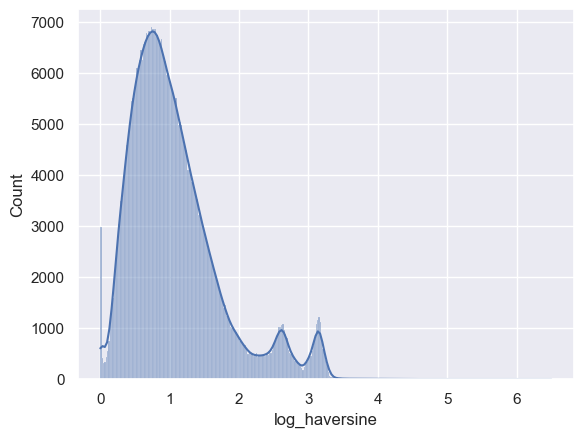

In [34]:
sns.histplot(X_test['log_haversine'], kde = True)

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [35]:
your_df = X_train
assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

<Axes: ylabel='Count'>

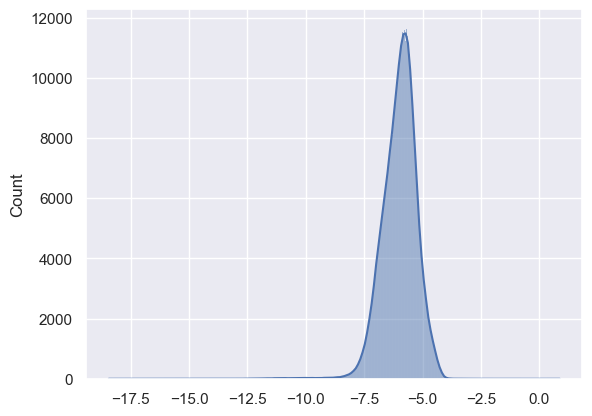

In [38]:
avg_speed = X_train['haversine'] / X_train['trip_duration']
X_train['avg_speed'] = X_train['haversine'] / X_train['trip_duration']
sns.histplot(np.log(avg_speed), kde = True )

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

<Axes: ylabel='Count'>

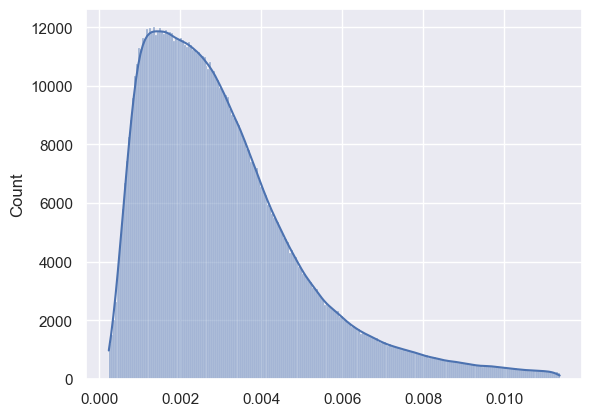

In [39]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.histplot(avg_speed[np.logical_and(avg_speed < avg_speed.quantile(0.99), avg_speed > avg_speed.quantile(0.01))], kde = True )

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

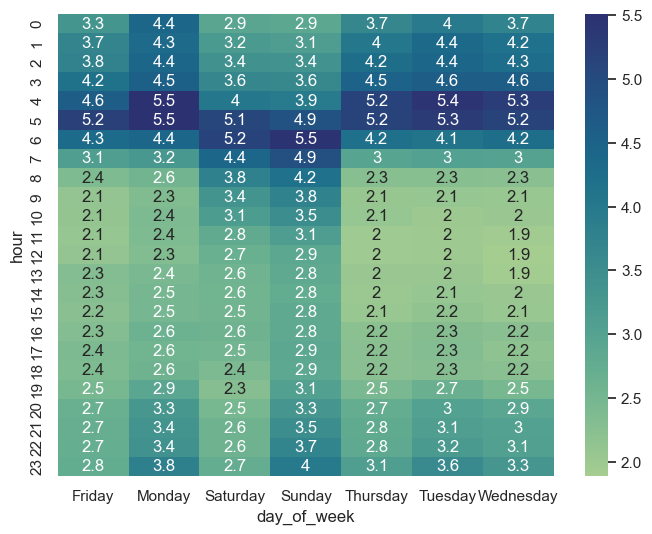

In [40]:
median_speeds = X_train.groupby(['day_of_week','hour'])['avg_speed'].median().reset_index()
heat = median_speeds.pivot(index='hour', columns='day_of_week', values='avg_speed')*1000
plt.figure(figsize=(8,6))
sns.heatmap(heat, cmap="crest",
    annot=True)
plt.show()


Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

In [41]:
X_train.drop(columns = ['avg_speed'], inplace = True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [42]:
def road_features(data: pd.DataFrame):
    data['road_dumb'] = ((data['hour'] <= 19) & (data['hour'] > 8) & (data['day_of_week'] == 'Friday'))
    data['road_dumb'] |= ((data['hour'] < 13) & (data['hour'] > 9) & (data['day_of_week'] == 'Monday'))
    data['road_dumb'] |= ((data['hour'] < 18) & (data['hour'] > 8) & (data['day_of_week'].isin(['Thursday','Tuesday','Wednesday'])))
    data['road_dumb'] |= ((data['hour'] < 21) & (data['hour'] > 16) & (data['day_of_week'] == 'Saturday'))
    data['road_free'] = ((data['hour'] < 6) & (data['hour'] > 3) & (data['day_of_week'].isin(['Monday','Friday','Thursday','Tuesday','Wednesday'])))
    data['road_free'] |= ((data['hour'] < 8) & (data['hour'] > 4) & (data['day_of_week'].isin(['Saturday','Sunday'])))
road_features(X_train)
road_features(X_test)

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака: 
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [43]:
airport_john_kennedy = (40.639722, -73.778889)
airport_laguarda =     (40.776927, -73.873965)
def kennedy_air(lat, lon):
    return haversine(40.639722, -73.778889, lat, lon) < 4
def laguarda_air(lat, lon):
    return haversine(40.776927, -73.873965, lat, lon) < 2
def add_airport_features(data: pd.DataFrame):
    data['kennedy_start'] = data.apply(lambda row: kennedy_air(row['pickup_latitude'], row['pickup_longitude']), axis=1)
    data['laguarda_start'] = data.apply(lambda row: laguarda_air(row['pickup_latitude'], row['pickup_longitude']), axis=1)
    data['kennedy_end'] = data.apply(lambda row: kennedy_air(row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
    data['laguarda_end'] = data.apply(lambda row: laguarda_air(row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
add_airport_features(X_train)
add_airport_features(X_test)
show_circles_on_map(X_train[X_train['kennedy_end'] ==True].sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")
    

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

Text(0.5, 1.0, 'laguarda_end')

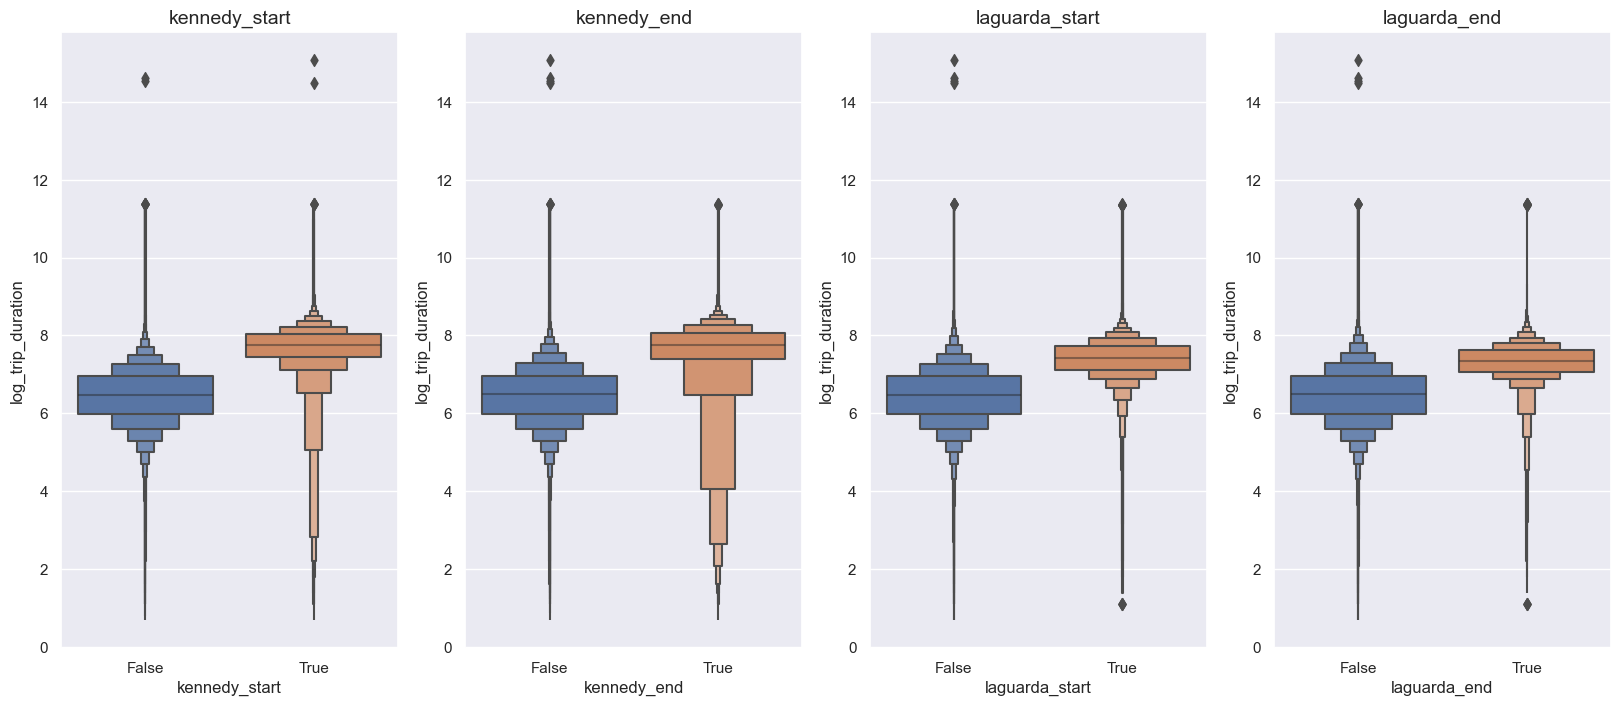

In [44]:
_, (ax1, ax2, ax3, ax4) = plt.subplots(ncols= 4,figsize = (20,8))

sns.boxenplot(X_train,
             x='kennedy_start',
             y = 'log_trip_duration',
             ax =ax1)
sns.boxenplot(X_train,
             x='kennedy_end',
             y = 'log_trip_duration',
             ax =ax2)
sns.boxenplot(X_train,
             x='laguarda_start',
             y = 'log_trip_duration',
             ax =ax3)
sns.boxenplot(X_train,
             x='laguarda_end',
             y = 'log_trip_duration',
             ax =ax4)

ax1.set_title('kennedy_start', fontsize = 14)
ax2.set_title('kennedy_end', fontsize = 14)
ax3.set_title('laguarda_start', fontsize = 14)
ax4.set_title('laguarda_end', fontsize = 14)

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin
from dataclasses import dataclass

@dataclass
class GridConfig:
    shape: tuple[int, int]
    size: float

# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    """
    Class MapGridTransformer

    Methods:
    ---------
    - fit(X, y): Must be called before `transform` or `show_map`.
    - transform(X, y): Transforms the data based on the grid configuration.
    - show_map(map): Visualizes the grid on a map. Requires `fit` to be called first.
    """

    def __init__(self, grid_config, lat, lng, name, center=None):
        self.grid_config = grid_config
        self.lat = lat
        self.lng = lng
        self.name = name
        self.center = center
        
    def grid_index(self, x, y):
        return x * self.grid_config.shape[1] + y
           
    def show_map(self, map):
        for x in range(self.grid_config.shape[0]):
            for y in range(self.grid_config.shape[1]):
                local_lower = self.lower + x * self.grid_config.size
                local_upper = local_lower + self.grid_config.size
                local_left = self.left + y * self.grid_config.size
                local_right = local_left + self.grid_config.size
                folium.Rectangle(
                    bounds=[(local_lower, local_left), (local_upper, local_right)],  
                    color="blue",                      
                    tooltip=f'{self.grid_index(x,y)}'               
                    ).add_to(map)
                
                
        return m
    
    def fit(self, X=None, y=None):
        if self.center is None:
            self.center = tuple(X[[self.lat, self.lng]].mean())
        self.lower = self.center[0] - self.grid_config.shape[0] * self.grid_config.size / 2
        self.left = self.center[1] - self.grid_config.shape[1] * self.grid_config.size / 2
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        lat, lng = (self.lat, self.lng)
        grid_lat = np.floor((X[lat] - self.lower) / self.grid_config.size).astype('int')
        grid_lng = np.floor((X[lng] - self.left) / self.grid_config.size).astype('int')
        X_copy[self.name + '_grid_id'] = np.where(
        (grid_lat >= 0) & (grid_lat< self.grid_config.shape[0]) &
        (grid_lng >= 0) & (grid_lng< self.grid_config.shape[1]),
        self.grid_index(grid_lat, grid_lng), -1)
        
        return X_copy

In [46]:
grid_map_pickup = MapGridTransformer(GridConfig((20, 12), 0.007), "pickup_latitude", "pickup_longitude", "pickup")
grid_map_dropoff = MapGridTransformer(GridConfig((20, 12), 0.007), "dropoff_latitude", "dropoff_longitude", "dropoff")
X_train = grid_map_pickup.fit_transform(X_train)
X_test = grid_map_pickup.fit_transform(X_test)
X_train = grid_map_dropoff.fit_transform(X_train)
X_test = grid_map_dropoff.fit_transform(X_test)


m = show_circles_on_map(X_train.sample(5000), "pickup_latitude", "pickup_longitude", "red", zoom_start=12)
grid_map_pickup.show_map(m)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [47]:
columns = ColumnTransformer(
    [
        ('scaler', MinMaxScaler(), ["day", "log_haversine",'kennedy_start','laguarda_start','kennedy_end','laguarda_end']),
        (
            "one-hot", 
            OneHotEncoder(dtype='int', drop='first', handle_unknown="ignore"), 
            ["day_of_week", "month", "hour", "anom23", "anom24", "road_free", "road_dumb",'pickup_grid_id','dropoff_grid_id']
        ),
    ],
    remainder='drop', 
    verbose_feature_names_out=False
)


model = Pipeline(
    [
        ("columns_trancform", columns),
        ("linreg", Ridge())
    ]
)

model.fit(X_train, X_train[["log_trip_duration"]]);

print("Test score:", np.sqrt(mean_squared_error(model.predict(X_test), X_test["log_trip_duration"])))
print("Train score:", np.sqrt(mean_squared_error(model.predict(X_train), X_train["log_trip_duration"])))

Test score: 0.5370107679723123
Train score: 0.5376107003907228


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [48]:
X_train['vendor_id'].value_counts()

vendor_id
2    545698
1    475352
Name: count, dtype: int64

In [49]:
X_train['passenger_count'].value_counts()

passenger_count
1    723660
2    147209
5     54672
3     41808
6     33814
4     19848
0        37
7         1
8         1
Name: count, dtype: int64

In [50]:
X_train['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    1015395
Y       5655
Name: count, dtype: int64

In [51]:
X_train['store_and_fwd_flag'] = (X_train['store_and_fwd_flag'] == 'Y').astype('bool')


In [52]:
X_test['store_and_fwd_flag'] = (X_test['store_and_fwd_flag'] == 'Y').astype('bool')

In [53]:
X_train['vendor_id'] = (X_train['vendor_id'] - 1).astype('bool')

In [54]:
X_test['vendor_id'] = (X_test['vendor_id'] - 1).astype('bool')

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

Text(0.5, 1.0, 'store_and_fwd_flag')

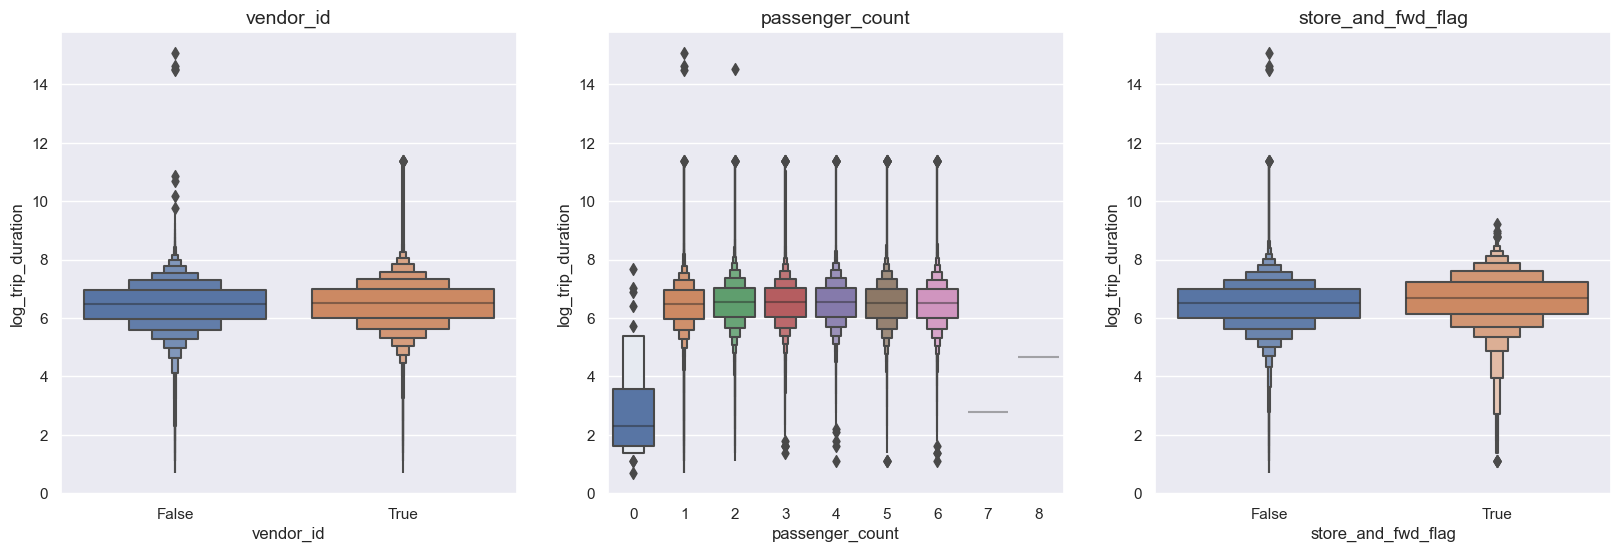

In [55]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
_, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (20, 6))

sns.boxenplot(X_train,
             x='vendor_id',
             y='log_trip_duration',
             ax=ax1)
sns.boxenplot(X_train,
             x='passenger_count',
             y='log_trip_duration',
             ax=ax2)
sns.boxenplot(X_train,
             x='store_and_fwd_flag',
             y='log_trip_duration',
             ax=ax3)
ax1.set_title('vendor_id', fontsize = 14)
ax2.set_title('passenger_count', fontsize = 14)
ax3.set_title('store_and_fwd_flag', fontsize =14)


Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [56]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟalready done

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [57]:
columns = ColumnTransformer(
    [
        ('scaler', MinMaxScaler(), ["day", "log_haversine", 'passenger_count']),
        (
            "one-hot", 
            OneHotEncoder(dtype='int', drop='first', handle_unknown="ignore"), 
            ["day_of_week", "month", "hour", "anom23", "anom24", "road_free", "road_dumb", 'kennedy_start','laguarda_start','kennedy_end','laguarda_end','vendor_id','store_and_fwd_flag']
        ),
    ],
    remainder='drop', 
    verbose_feature_names_out=False
)


model = Pipeline(
    [
        ("columns_trancform", columns),
        ("linreg", Ridge())
    ]
)

model.fit(X_train, X_train[["log_trip_duration"]]);

print("Test score:", np.sqrt(mean_squared_error(model.predict(X_test), X_test["log_trip_duration"])))
print("Train score:", np.sqrt(mean_squared_error(model.predict(X_train), X_train["log_trip_duration"])))

Test score: 0.5563172145545362
Train score: 0.5571374364616595


## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

<Axes: xlabel='log_trip_duration', ylabel='Count'>

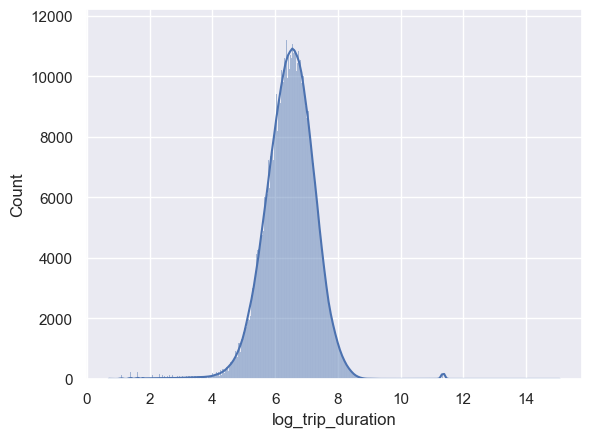

In [58]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.histplot(X_train['log_trip_duration'], kde = True)

In [59]:
X_train = X_train[((X_train['log_trip_duration'] >=2) &(X_train['log_trip_duration']<=10))]

<Axes: xlabel='log_trip_duration', ylabel='Count'>

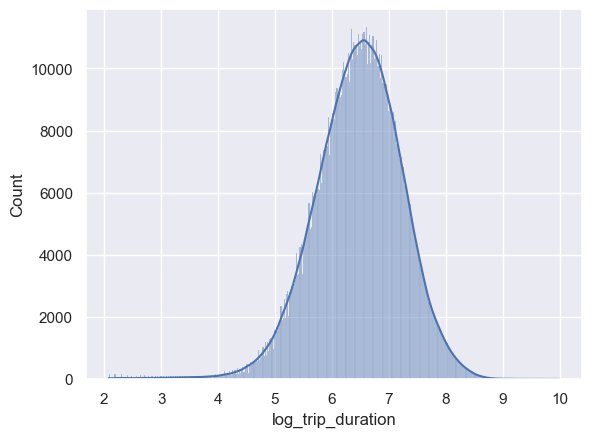

In [60]:
sns.histplot(X_train['log_trip_duration'], kde = True)

<Axes: xlabel='log_haversine', ylabel='Count'>

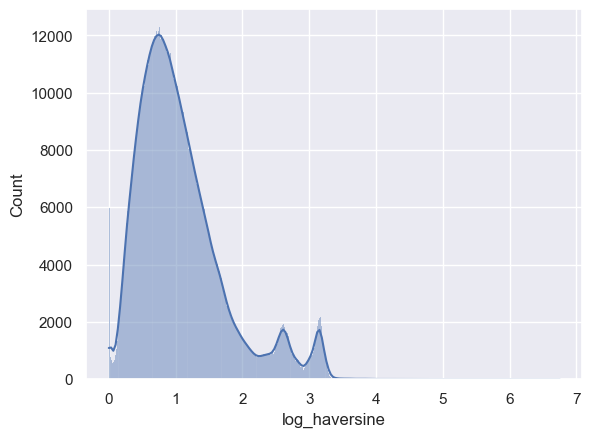

In [61]:
sns.histplot(X_train['log_haversine'], kde = True)

In [62]:
X_train["log_haversine"].nsmallest(10000).value_counts()

log_haversine
0.000000    3808
0.000848      50
0.000848      31
0.000848      15
0.000848      12
            ... 
0.014658       1
0.014654       1
0.014624       1
0.014621       1
0.100914       1
Name: count, Length: 6056, dtype: int64

In [63]:
X_train["log_haversine"].nlargest(10000).value_counts()

log_haversine
6.748723    1
3.184423    1
3.184483    1
3.184477    1
3.184449    1
           ..
3.226944    1
3.226937    1
3.226921    1
3.226887    1
3.160165    1
Name: count, Length: 10000, dtype: int64

In [64]:
X_train = X_train[((X_train['log_haversine']>=0.01) & (X_train['log_haversine']<4))]

<Axes: xlabel='log_haversine', ylabel='Count'>

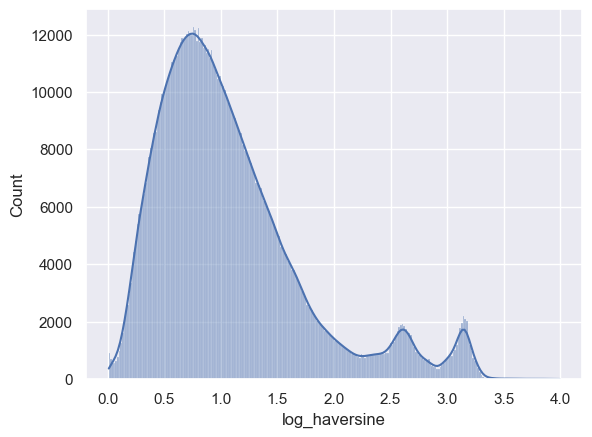

In [65]:
sns.histplot(X_train['log_haversine'], kde = True)

<Axes: ylabel='Count'>

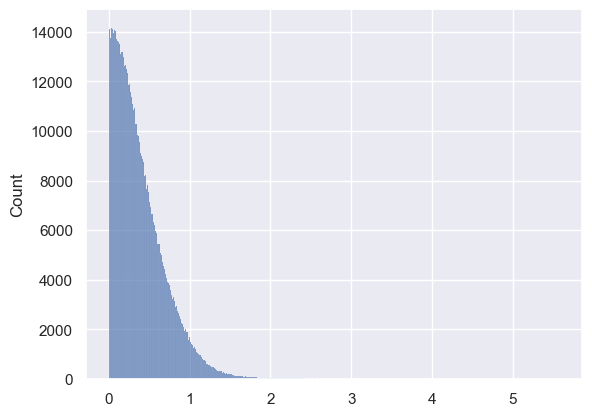

In [66]:
y_pred = model.predict(X_train).ravel()
X_true = X_train['log_trip_duration'].values.ravel()
regression_lost = abs(X_true - y_pred)
sns.histplot(regression_lost)

In [67]:
regression_lost = pd.Series(regression_lost)
regression_lost.nlargest(5000).value_counts()

5.581174    1
1.739462    1
1.738865    1
1.739073    1
1.739166    1
           ..
2.031423    1
2.031480    1
2.032251    1
2.032312    1
1.596643    1
Name: count, Length: 5000, dtype: int64

In [68]:
X_train['regression_residual'] = abs(X_train['log_trip_duration'].ravel() - model.predict(X_train).ravel())

In [69]:
X_train = X_train[X_train['regression_residual'] < 3]

<Axes: xlabel='regression_residual', ylabel='Count'>

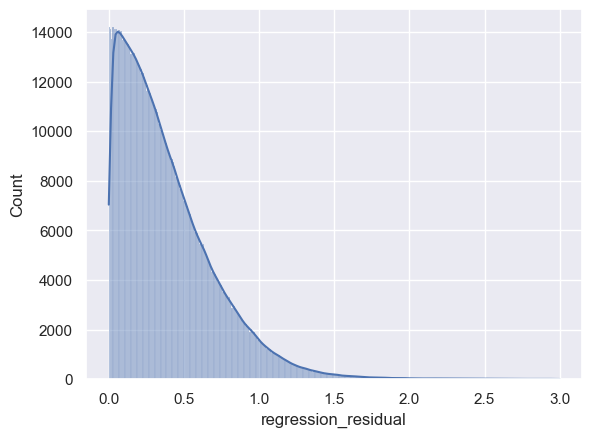

In [70]:
sns.histplot(X_train['regression_residual'], kde = True)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие). 

In [71]:
X_train.dtypes

id                             object
vendor_id                        bool
pickup_datetime        datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag               bool
trip_duration                   int64
log_trip_duration             float64
day                             int32
day_of_week                    object
hour                            int32
month                          object
anom23                           bool
anom24                           bool
haversine                     float64
log_haversine                 float64
road_dumb                        bool
road_free                        bool
kennedy_start                    bool
laguarda_start                   bool
kennedy_end                      bool
laguarda_end                     bool
pickup_grid_id                  int32
dropoff_grid

In [72]:
'''Анлак, нет редких категорий'''

'Анлак, нет редких категорий'

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [73]:
columns = ColumnTransformer(
    [
        ('scaler', MinMaxScaler(), ["day", "log_haversine", 'kennedy_start','laguarda_start','kennedy_end','laguarda_end','vendor_id','store_and_fwd_flag']),
        (
            "one-hot", 
            OneHotEncoder(dtype='int', drop='first', handle_unknown="ignore"), 
            ["day_of_week", "month", "hour", "anom23", "anom24", "road_free", "road_dumb",'pickup_grid_id','dropoff_grid_id','passenger_count']
        ),
    ],
    remainder='drop', 
    verbose_feature_names_out=False
)


model = Pipeline(
    [
        ("columns_trancform", columns),
        ("linreg", Ridge())
    ]
)

model.fit(X_train, X_train[["log_trip_duration"]]);

print("Test score:", np.sqrt(mean_squared_error(model.predict(X_test), X_test["log_trip_duration"])))
print("Train score:", np.sqrt(mean_squared_error(model.predict(X_train), X_train["log_trip_duration"])))

Test score: 0.5371548815021954
Train score: 0.47626608227531214


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [74]:
X_train.shape[1]

28

In [75]:
columns.transform(X_train).shape

(1012758, 475)

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [76]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

model = Pipeline(
    [
        ("columns_trancform", columns),
        ("linreg", Lasso(alpha = 0.001))
    ]
)

model.fit(X_train, X_train[["log_trip_duration"]]);

print("Test score:", np.sqrt(mean_squared_error(model.predict(X_test), X_test["log_trip_duration"])))
print("Train score:", np.sqrt(mean_squared_error(model.predict(X_train), X_train["log_trip_duration"])))


Test score: 0.5486355771812549
Train score: 0.4879844499547972


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [77]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [78]:
from tqdm import tqdm

X_train_for_valid, valid= train_test_split(X_train, test_size=0.2, random_state=10)
alphas = np.logspace(-5, 2, 30)
grid_search_result = []

for alpha in tqdm(alphas):
    model = Pipeline(
        [
            ("columns_trancform", columns),
            ("linreg", Lasso(alpha))
        ]

    )
    model.fit(X_train_for_valid, X_train_for_valid['log_trip_duration'])
    train_score = np.sqrt(mean_squared_error(model.predict(X_train_for_valid), X_train_for_valid["log_trip_duration"]))
    test_score =  np.sqrt(mean_squared_error(model.predict(X_test), X_test["log_trip_duration"]))
    cv_score = np.sqrt(mean_squared_error(model.predict(valid), valid["log_trip_duration"]))
    zero_score = (model.steps[-1][1].coef_==0).sum()
    grid_search_result.append([alpha, "lasso", train_score, test_score, cv_score, zero_score])
    

for alpha in tqdm(alphas):
    model = Pipeline(
        [
            ("columns_trancform", columns),
            ("linreg", Ridge(alpha))
        ]

    )
    model.fit(X_train_for_valid, X_train_for_valid['log_trip_duration'])
    train_score = np.sqrt(mean_squared_error(model.predict(X_train_for_valid), X_train_for_valid["log_trip_duration"]))
    test_score =  np.sqrt(mean_squared_error(model.predict(X_test), X_test["log_trip_duration"]))
    cv_score = np.sqrt(mean_squared_error(model.predict(valid), valid["log_trip_duration"]))
    zero_score = (model.steps[-1][1].coef_ ==0).sum()
    grid_search_result.append([alpha, "ridge", train_score, test_score, cv_score, zero_score])
    
    
    
grid_search_result = pd.DataFrame.from_records(
    grid_search_result, 
    columns=["Alpha", "Model type", 'Train score', 'Test score', "CV score", "Zero weights count"]
)

grid_search_result
    
    
    



100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [07:18<00:00, 14.61s/it]


Alpha Model type  Train score  Test score  CV score  \
0     0.000010      lasso     0.476947    0.537378  0.474443   
1     0.000017      lasso     0.477062    0.537517  0.474555   
2     0.000030      lasso     0.477267    0.537757  0.474760   
3     0.000053      lasso     0.477605    0.538116  0.475095   
4     0.000092      lasso     0.478214    0.538744  0.475709   
5     0.000161      lasso     0.479201    0.539692  0.476731   
6     0.000281      lasso     0.480749    0.541138  0.478282   
7     0.000489      lasso     0.483316    0.543554  0.480839   
8     0.000853      lasso     0.486972    0.547142  0.484509   
9     0.001487      lasso     0.493522    0.553587  0.491067   
10    0.002593      lasso     0.504408    0.564384  0.501933   
11    0.004520      lasso     0.512829    0.572698  0.510232   
12    0.007880      lasso     0.518541    0.578280  0.515747   
13    0.013738      lasso     0.524449    0.584258  0.521523   
14    0.023950      lasso     0.540154    0.599598  0.537069   
15    0.041753      lasso     0.585304    0.642725  0.582093   
16    0.072790      lasso     0.689792    0.742915  0.686387   
17    0.126896      lasso     0.743080    0.794302  0.739642   
18    0.221222      lasso     0.743080    0.794302  0.739642   
19    0.385662      lasso     0.743080    0.794302  0.739642   
20    0.672336      lasso     0.743080    0.794302  0.739642   
21    1.172102      lasso     0.743080    0.794302  0.739642   
22    2.043360      lasso     0.743080    0.794302  0.739642   
23    3.562248      lasso     0.743080    0.794302  0.739642   
24    6.210169      lasso     0.743080    0.794302  0.739642   
25   10.826367      lasso     0.743080    0.794302  0.739642   
26   18.873918      lasso     0.743080    0.794302  0.739642   
27   32.903446      lasso     0.743080    0.794302  0.739642   
28   57.361525      lasso     0.743080    0.794302  0.739642   
29  100.000000      lasso     0.743080    0.794302  0.739642   
30    0.000010      ridge     0.476783    0.537170  0.474343   
31    0.000017      ridge     0.476783    0.537170  0.474343   
32    0.000030      ridge     0.476783    0.537170  0.474342   
33    0.000053      ridge     0.476783    0.537170  0.474342   
34    0.000092      ridge     0.476783    0.537170  0.474343   
35    0.000161      ridge     0.476783    0.537170  0.474342   
36    0.000281      ridge     0.476783    0.537170  0.474342   
37    0.000489      ridge     0.476783    0.537170  0.474342   
38    0.000853      ridge     0.476783    0.537170  0.474342   
39    0.001487      ridge     0.476783    0.537170  0.474342   
40    0.002593      ridge     0.476783    0.537171  0.474343   
41    0.004520      ridge     0.476783    0.537170  0.474343   
42    0.007880      ridge     0.476783    0.537170  0.474342   
43    0.013738      ridge     0.476783    0.537170  0.474342   
44    0.023950      ridge     0.476783    0.537172  0.474342   
45    0.041753      ridge     0.476783    0.537171  0.474342   
46    0.072790      ridge     0.476783    0.537171  0.474343   
47    0.126896      ridge     0.476783    0.537172  0.474342   
48    0.221222      ridge     0.476784    0.537175  0.474344   
49    0.385662      ridge     0.476786    0.537177  0.474343   
50    0.672336      ridge     0.476789    0.537184  0.474346   
51    1.172102      ridge     0.476794    0.537190  0.474345   
52    2.043360      ridge     0.476801    0.537199  0.474347   
53    3.562248      ridge     0.476809    0.537208  0.474347   
54    6.210169      ridge     0.476819    0.537218  0.474345   
55   10.826367      ridge     0.476830    0.537236  0.474348   
56   18.873918      ridge     0.476846    0.537265  0.474357   
57   32.903446      ridge     0.476871    0.537316  0.474374   
58   57.361525      ridge     0.476917    0.537405  0.474411   
59  100.000000      ridge     0.477009    0.537567  0.474494   

    Zero weights count  
0                  115  
1                  144  
2                  176  
3   

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

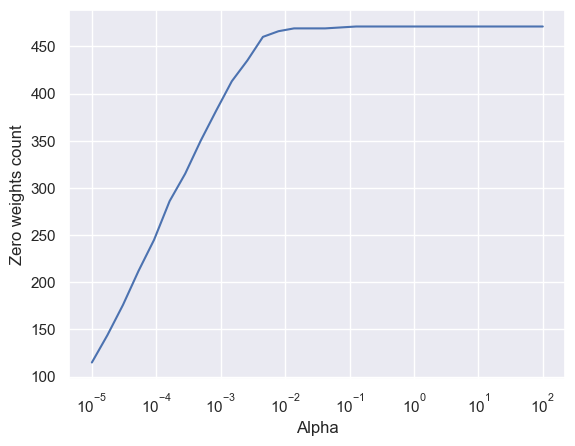

In [79]:
sns.lineplot(
    grid_search_result[grid_search_result['Model type'] == 'lasso'],
    x='Alpha', 
    y='Zero weights count'
).set(xscale='log');

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [80]:
X_train

id  vendor_id     pickup_datetime  passenger_count  \
824746   id2365163       True 2016-03-27 00:25:29                3   
645821   id3126187       True 2016-03-18 20:44:12                1   
691846   id2588127       True 2016-04-15 18:26:12                2   
1147931  id0915715       True 2016-03-24 14:28:34                1   
183569   id3758776      False 2016-04-28 13:53:52                1   
...            ...        ...                 ...              ...   
1348317  id2763967      False 2016-05-12 05:16:06                1   
1154171  id0853058      False 2016-01-16 19:14:54                1   
617841   id2242904      False 2016-03-21 20:11:12                1   
1048548  id2558617      False 2016-04-09 09:21:44                1   
1393929  id3799449      False 2016-04-27 09:11:19                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
824746         -73.996986        40.742210         -73.987740   
645821         -73.989929        40.741760         -73.977280   
691846         -73.972366        40.750725         -73.861832   
1147931        -73.982361        40.776901         -73.975128   
183569         -73.973778        40.764374         -73.966957   
...                   ...              ...                ...   
1348317        -73.996178        40.748222         -73.990967   
1154171        -73.995415        40.728886         -73.993706   
617841         -73.960091        40.779701         -73.960136   
1048548        -73.968124        40.799923         -73.952415   
1393929        -74.004715        40.707268         -74.014168   

         dropoff_latitude  store_and_fwd_flag  trip_duration  ...  \
824746          40.710659               False           1254  ...   
645821          40.783600               False            970  ...   
691846          40.768387               False           2084  ...   
1147931         40.760921               False            980  ...   
183569          40.761024               False            481  ...   
...                   ...                 ...            ...  ...   
1348317         40.755478               False            180  ...   
1154171         40.744068               False           6552  ...   
617841          40.773102               False            151  ...   
1048548         40.818588               False            436  ...   
1393929         40.713989               False           1271  ...   

         log_haversine  road_dumb road_free  kennedy_start laguarda_start  \
824746        0.880379      False     False          False          False   
645821        1.066174      False     False          False          False   
691846        2.587984       True     False          False          False   
1147931       0.663699       True     False          False          False   
183569        0.568358       True     False          False          False   
...                ...        ...       ...            ...            ...   
1348317       0.482835      False      True          False          False   
1154171       0.407320       True     False          False          False   
617841        0.184672      False     False          False          False   
1048548       1.043269      False     False          False          False   
1393929       0.728071       True     False          False          False   

         kennedy_end  laguarda_end  pickup_grid_id  dropoff_grid_id  \
824746         False         False              98               51   
645821         False         False              99              173   
691846         False          True             114               -1   
1147931        False         False             160              137   
183569         False         False             137              138   
...              ...           ...             ...              ...   
1348317        False         False             110              123   
1154171        False         False              74               99   
6

In [81]:
popular_route = X_train.groupby(["pickup_grid_id", "dropoff_grid_id"])["id"].count().nlargest(100).reset_index().reset_index().rename(columns={"index": "popular_route"})

popular_route

popular_route  pickup_grid_id  dropoff_grid_id     id
0               0              -1               -1  23232
1               1             136               -1   3362
2               2             111               -1   2346
3               3             125               -1   2313
4               4             137               -1   2303
..            ...             ...              ...    ...
95             95             148              136    917
96             96             111              126    916
97             97             152              164    911
98             98             113              100    910
99             99              86               -1    909

[100 rows x 4 columns]

In [82]:
train = X_train.merge(popular_route, on=['pickup_grid_id', 'dropoff_grid_id'], how='left').fillna(-1).drop(columns=["id_x", "id_y"])
test = X_test.merge(popular_route, on=['pickup_grid_id', 'dropoff_grid_id'], how='left').fillna(-1).drop(columns=["id_x", "id_y"])

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [83]:
columns = ColumnTransformer(
    [
        ('scaler', MinMaxScaler(), ["day", "log_haversine", "vendor_id", "store_and_fwd_flag", 'kennedy_start','laguarda_start','kennedy_end','laguarda_end']),
        (
            "one-hot", 
            OneHotEncoder(dtype='int', drop='first', handle_unknown="ignore"), 
            [
                "day_of_week", "month", "hour", "anom23", 
                "anom24", "road_free", "road_dumb", "pickup_grid_id", 
                "dropoff_grid_id", "passenger_count", "popular_route"
            ]
        ),
    ],
    remainder='drop', 
    verbose_feature_names_out=False
)   

model = Pipeline(
    [
        ("columns_trancform", columns),
        ("linreg", Ridge(alpha=0.001))
    ]
)
    
model.fit(train, train[["log_trip_duration"]])

print("Test score:", np.sqrt(mean_squared_error(model.predict(test), test["log_trip_duration"])))
print("Train score:", np.sqrt(mean_squared_error(model.predict(train), train["log_trip_duration"])))

Test score: 0.5324444814929681
Train score: 0.4706957980072778


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ